# pandas实践-2012美国总统竞选赞助数据分析

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 数据载入和总览

## 1.1 数据载入(pd.read_csv())

In [2]:
data  = pd.read_csv('2012_Federal_Election_Commission_Database.csv')

各个字段含义:

字段名|含义
:-|:-
cand_nm | 接受捐赠的候选人姓名
contbr_nm | 捐赠人姓名
contbr_st | 捐赠人所在州
contbr_employer | 捐赠人所在公司
contbr_occupation | 捐赠人职业
contb_receipt_amt | 捐赠数额（美元）
contb_receipt_dt | 收到捐款的日期

## 1.2 数据预览

In [3]:
data

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11
...,...,...,...,...,...,...,...
1001726,"Perry, Rick","GORMAN, CHRIS D. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11
1001727,"Perry, Rick","DUFFY, DAVID A. MR.",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11
1001728,"Perry, Rick","GRANE, BRYAN F. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11
1001729,"Perry, Rick","TOLBERT, DARYL MR.",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11


In [4]:
#查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001731 non-null  object 
 1   contbr_nm          1001731 non-null  object 
 2   contbr_st          1001727 non-null  object 
 3   contbr_employer    988002 non-null   object 
 4   contbr_occupation  993301 non-null   object 
 5   contb_receipt_amt  1001731 non-null  float64
 6   contb_receipt_dt   1001731 non-null  object 
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


In [5]:
#用统计学指标快速描述数据的概要，包括平均值，标准差，最小值，最大值等
data.describe(include='all')

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
count,1001731,1001731,1001727,988002,993301,1.001731e+06,1001731
unique,13,364681,74,135650,45073,NaN,466
top,"Obama, Barack","SEBAG, DAVID",CA,RETIRED,RETIRED,NaN,31-MAR-12
freq,593746,267,148724,207442,234829,NaN,23153
mean,NaN,NaN,NaN,NaN,NaN,2.982352e+02,NaN
std,NaN,NaN,NaN,NaN,NaN,3.749667e+03,NaN
min,NaN,NaN,NaN,NaN,NaN,-3.080000e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.500000e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+02,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.500000e+02,NaN


# 2. 数据清洗
## 2.1 缺失值处理

In [6]:
#将缺失值填补为 not provided
data['contbr_st'].fillna(value='NOT PROVIDED', inplace = True)
data['contbr_employer'].fillna(value='NOT PROVIDED', inplace = True)
data['contbr_occupation'].fillna(value='NOT PROVIDED', inplace = True)
#再次查看info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001731 non-null  object 
 1   contbr_nm          1001731 non-null  object 
 2   contbr_st          1001731 non-null  object 
 3   contbr_employer    1001731 non-null  object 
 4   contbr_occupation  1001731 non-null  object 
 5   contb_receipt_amt  1001731 non-null  float64
 6   contb_receipt_dt   1001731 non-null  object 
dtypes: float64(1), object(6)
memory usage: 53.5+ MB


## 2.2 数据转换
### 利用字典进行转换:党派分析
* 通过候选人姓名，得到对应党派信息

In [7]:
#查看数据中的总统候选人
print('共有{}位候选人，分别是'.format(data['cand_nm'].nunique()))
data['cand_nm'].unique()

共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {
    'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'
}

增加一列party存储党派信息

In [9]:
#通过map映射函数，增加一列party存储党派信息
data['party'] = data['cand_nm'].map(parties)
data

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican
...,...,...,...,...,...,...,...,...
1001726,"Perry, Rick","GORMAN, CHRIS D. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,Republican
1001727,"Perry, Rick","DUFFY, DAVID A. MR.",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,Republican
1001728,"Perry, Rick","GRANE, BRYAN F. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,Republican
1001729,"Perry, Rick","TOLBERT, DARYL MR.",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,Republican


In [10]:
#查看两个党派的情况
data['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

### 排序:按照职业汇总对赞助总金额进行排序
* 按照职位进行汇总，计算赞助总金额

>DataFrame.sort_values(by, ascending=True, inplace=False)  
>
>by是根据哪一列进行排序，可以传入多列；ascending=True是升序排序，False为降序；inplace=Ture则是修改原dataframe，默认为False

In [11]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)

contbr_occupation
RETIRED                                   48176447.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
                                             ...     
PRES OF GAS & ELECTRIC                       -2500.00
AVIATION ATTORNEY                            -2500.00
DREDGING                                     -2500.00
METAL SMITH                                  -4225.00
VENTURE PHILANTHROPIST                       -5000.00
Name: contb_receipt_amt, Length: 45074, dtype: float64

### 利用函数进行数据转换: 职业与雇主信息分析
* 对职业信息进行转换，把相同职业的不同表达映射为对应的职业

In [12]:
#建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO
occupation_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED',
    'C.E.O.':'CEO',
    'LAWYER':'ATTORNEY',
}

#如果不在字典中，返回x
f = lambda x: occupation_map.get(x,x)
data.contbr_occupation = data.contbr_occupation.map(f)

* 同样的，对雇主信息进行类似的转换

In [13]:
employer_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

f = lambda x:employer_map.get(x,x)
data.contbr_employer = data.contbr_employer.map(f)


## 2.3 数据筛选
### 赞助金额筛选
赞助还包括退款(负数出资额)，为了简化分析过程，筛选出所有正出资额的数据集

In [14]:
data = data[data['contb_receipt_amt']>0]

### 候选人筛选(筛选出获得赞助最多的候选人)

In [15]:
#查看各个候选人获得的总赞助金额
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358774e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030575e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [16]:
#选取候选人为Obama和Romney的子数据集
data_top2 = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()
data_top2

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
701381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
701382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
701383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
701384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


## 2.4 区间化数据
### 利用cut函数根据出资额大小将数据离散化到多个区间中

In [17]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_top2['contb_receipt_amt'],bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

# 3. 数据聚合与分组运算
>分组计算Grouping，分组运算是一个“split-apply-combine”的过程：
>
>* 拆分，pandas对象中的数据会根据你所提供的一个或多个键被拆分为多组
>* 应用，将一个函数应用到各个分组并产生一个新值
>* 合并，所有这些函数的执行结果会合并到最终的结果对象中
>
>![分组运算](分组运算.jpg)

## 3.1 透视表(pivot_table)分析党派和职业
* 通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资不足200万美元的数据

In [18]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc=np.sum)
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [19]:
#过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDED,13725187.32,2.097161e+07


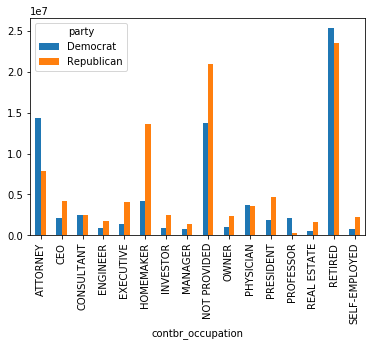

In [20]:
over_2mm.plot(kind='bar')

## 3.2 分组级运算和转换
### 根据职业与雇主信息分组运算
接下来了解一下对Obama和Romney总出资最高的职业和雇主。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”

In [21]:
#职业和雇主的处理非常相似
#定义函数get_top_amounts()对两个字段进行分析处理
def get_top_amounts(group,key,n=5):
    #传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]

grouped = data_top2.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [22]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

### 对赞助金额进行分组分析(matplotlib画图)
前面已经利用pd.cut()函数，根据出资额的大小将数据离散化到多个区间中，现在对每个离散化的区间进行分组分析。
首先统计各个出资区间的赞助笔数，这里用到unstack(), stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变成表格数据

In [23]:
#labels是之前赞助金额离散化后的Series
grouped_bins = data_top2.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


接下来，再统计各个区间的赞助金额

In [24]:
bucket_sums = grouped_bins.sum().unstack(0)
bucket_sums

contb_receipt_amt             
cand_nm                 Obama, Barack Romney, Mitt
contb_receipt_amt                                 
(0, 1]                         318.24        77.00
(1, 10]                     337267.62     29819.66
(10, 100]                 20288981.41   1987783.76
(100, 1000]               54798531.46  22363381.69
(1000, 10000]             51753705.67  63942145.42
(10000, 100000]              59100.00     12700.00
(100000, 1000000]          1490683.08          NaN
(1000000, 10000000]        7148839.76          NaN

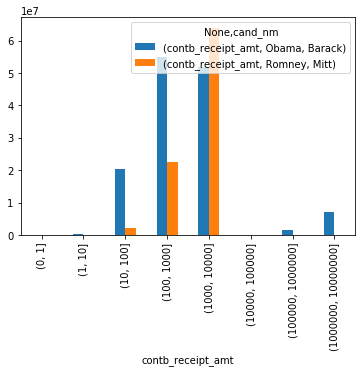

In [25]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

上图虽然能够大概看出Obama、Romney的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果会更好，下面我们就实现以下。

In [26]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

contb_receipt_amt             
cand_nm                 Obama, Barack Romney, Mitt
contb_receipt_amt                                 
(0, 1]                       0.805182     0.194818
(1, 10]                      0.918767     0.081233
(10, 100]                    0.910769     0.089231
(100, 1000]                  0.710176     0.289824
(1000, 10000]                0.447326     0.552674
(10000, 100000]              0.823120     0.176880
(100000, 1000000]            1.000000          NaN
(1000000, 10000000]          1.000000          NaN

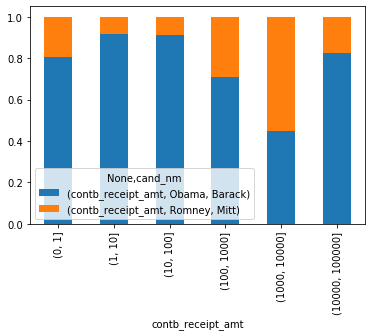

In [27]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多

### 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

In [32]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
KARIMIAN, AFSANEH         87
NURU, ISAAC               87
MASTERS, MARGERY          85
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

# 4. 时间处理

## 4.1 str转datetime

使用to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。我们也可以指定特定的日期解析格式，如pd.to_datetime(series,format='%Y%m%d')

In [35]:
data_top2['time'] = pd.to_datetime(data_top2['contb_receipt_dt'])
data_top2

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,time
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican,2012-02-01
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican,2012-02-01
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican,2012-04-13
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican,2011-08-21
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican,2012-03-07
...,...,...,...,...,...,...,...,...,...
701381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat,2012-02-26
701382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat,2012-01-20
701383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat,2012-01-20
701384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat,2012-04-26


## 4.2 以时间作为索引

In [40]:
#data_top2.set_index('time',inplace=True)
data_top2

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
2012-02-26,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
2012-01-20,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
2012-01-20,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat


## 4.3重采样和频度转换
重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样。

In [43]:
top2_time = data_top2.groupby('cand_nm').resample('M')['cand_nm'].count()
top2_time.unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13830,1096
2011-05-31,12182,4163
2011-06-30,25626,5757
2011-07-31,12372,2454
2011-08-31,19860,3226
2011-09-30,46926,7968
2011-10-31,25941,5349
2011-11-30,32629,7737
2011-12-31,63562,10289


用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势

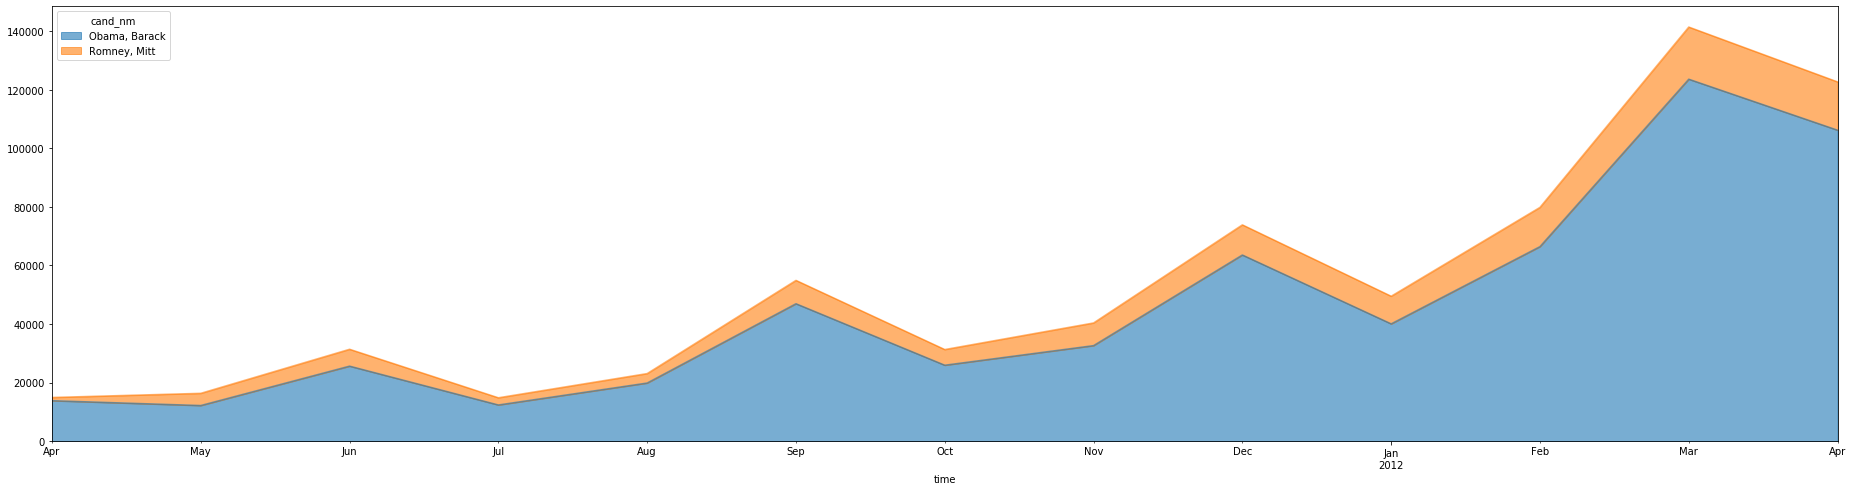

In [45]:
fig1, ax1=plt.subplots(figsize=(32,8))
top2_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()